In [25]:
import numpy # matrices and multi - dimensional arrays , linear algebra
import sklearn # machine learning
import matplotlib # plotting

In [26]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


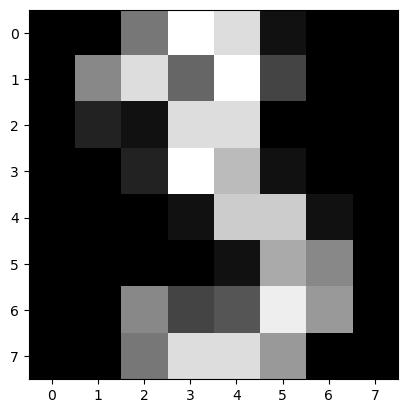

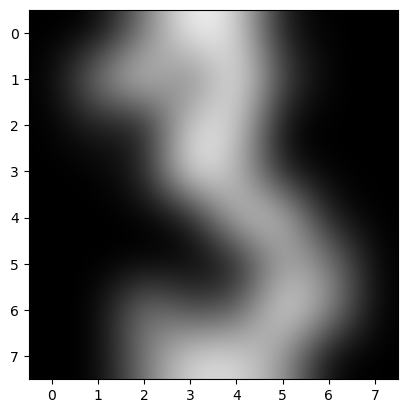

In [27]:
import numpy as np
import matplotlib.pyplot as plt

img = images[3]

assert 2 == len(img.shape)

plt.figure()
plt.gray()
plt.imshow(img, interpolation='nearest')
plt.show()
plt.imshow(img, interpolation='bicubic') 
plt.show()


<div style="color: green; font-weight: bold">Comment</div>

The solutions are essentialy the same.

In [28]:
filter_indices = np.where(np.isin(target, [3, 9]))

# Use the filtered indices to get the corresponding elements from data, images, and target
data = data[filter_indices]
images = images[filter_indices]
target = target[filter_indices]

In [29]:
from sklearn import model_selection

X_all = data
y_all = target
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.4, random_state=0)

<div style="color: green; font-weight: bold">Comment</div>

The solutions are essentially the same.

In [30]:
def features2d(x):
    features = np.zeros((x.shape[0], 2))
    for i in range(x.shape[0]):
        features[i, 0] = x[i, 10] + x[i, 18] + x[i, 26]
        features[i, 1] = x[i, 26] + x[i, 27] + x[i, 28]
       
    return features

features_all = features2d(X_all)
features_train = features2d(X_train)
features_test = features2d(X_test)

<div style="color: green; font-weight: bold">Comment</div>

The solutions are essentially the same. Both solutions look at the pixel values of two areas in the image, but our solution doesn't take the mean, which shouldn't affect it's potency. Our features are able to distinguish between 3s and 9s, but could have definitely been better chosen. We could have worked on a more sophisticated way to try to differentiate between the numbers, or we could have also examined our training data to see which pixels vary on average the most between 3s and 9s to give the pixels weights for their importance.

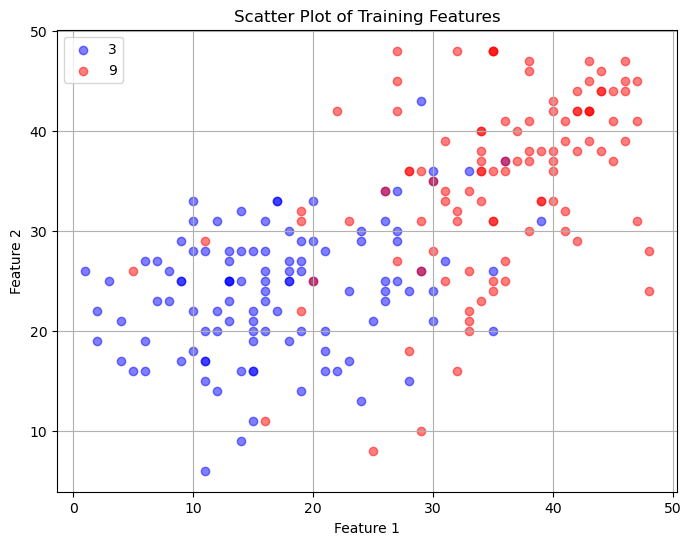

In [31]:
def plot_points_with_colors(points, labels):
    # Extract x and y coordinates
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    
    # Create a mask for points labeled as 3 and 9
    mask_3 = (labels == 3)
    mask_9 = (labels == 9)

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords[mask_3], y_coords[mask_3], marker='o', color='blue', label='3', alpha=0.5)
    plt.scatter(x_coords[mask_9], y_coords[mask_9], marker='o', color='red', label='9', alpha=0.5)
    plt.title('Scatter Plot of Training Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_points_with_colors(features_train, y_train)

<div style="color: green; font-weight: bold">Comment</div>

The solutions are essentially the same.

In [32]:
def nearest_mean(X_train, y_train, X_test):

    #Compute the mean of each class
    mean_3 = np.mean(X_train[y_train == 3], axis=0)
    mean_9 = np.mean(X_train[y_train == 9], axis=0)
    
    # Compute the Euclidean distance from each test point to the mean of each class
    distance_3 = np.linalg.norm(X_test - mean_3, axis=1)
    distance_9 = np.linalg.norm(X_test - mean_9, axis=1)
    
    # Classify test points based on the minimum distance
    test_labels = np.where(distance_3 < distance_9, -1, 1)
    
    return test_labels, mean_3, mean_9

def calculate_error_rate(predicted_labels, true_labels):
    total_sample = len(true_labels)
    fn = 0
    fp = 0
    for i in range(total_sample):
        if predicted_labels[i] != -1 and true_labels[i] == 3:
            fn += 1
        elif predicted_labels[i] != 1 and true_labels[i] == 9:
            fp += 1
    
    return (fp + fn) / total_sample  

predicted_labels_mean, mean_3, mean_9 = nearest_mean(features_train, y_train, features_test)
error_rate_mean = calculate_error_rate(predicted_labels_mean, y_test)
print(f"Error Rate Nearest Mean: {error_rate_mean*100:.2f}%")


Error Rate Nearest Mean: 11.64%


<div style="color: green; font-weight: bold">Comment</div>

Both solutions of the nearest_mean() function fulfill the task but ours, while I find it to be more readable, is only meant for two features whereas the provided solution can be used for any amount of features. Also by separating the distance_from_mean() function it could also be passed as a callback function to use different distance metrics and make it more modular.

The error rate calculation is more sophisticated in the given solution. I have decided to implement it differently to be able to see if more 3s are identified as 9s or the other way around but since I never used this due to time constraints there is no point to our slower implementation.

I wouldn't say 11,46% is a bad result but there is a lot room for improvement simply by tweaking on our features.

At this point the task was a little bit confusing and I was not sure if I am supposed to implement a linear classifier. Originally I did implement one with a simple grid-based hyperoptimization but decided to delete it since it wasn't asked for.

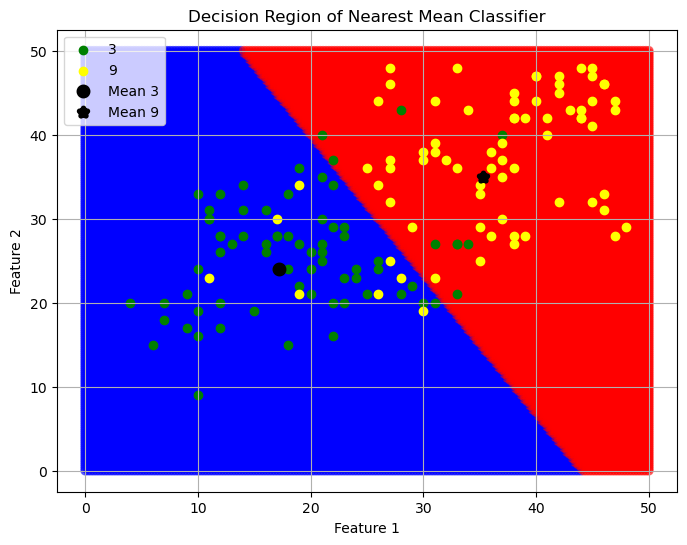

In [33]:
# Create a 200x200 grid
x_min, x_max = 0, 50
y_min, y_max = 0, 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

grid_values = np.c_[xx.ravel(), yy.ravel()]

distance_3 = np.linalg.norm(grid_values - mean_3, axis=1)
distance_9 = np.linalg.norm(grid_values - mean_9, axis=1)
    
# Classify test points based on the minimum distance
decision_region = np.where(distance_3 < distance_9, -1, 1)

# Extract x and y coordinates from grid_values
x_coords = grid_values[:, 0]
y_coords = grid_values[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c=np.where(decision_region == -1, 'blue', 'red'), marker='o', alpha=0.5)
plt.scatter(features_test[y_test == 3, 0], features_test[y_test == 3, 1], c='green', marker='o', label='3')
plt.scatter(features_test[y_test == 9, 0], features_test[y_test == 9, 1], c='yellow', marker='o', label='9')
plt.scatter(mean_3[0], mean_3[1], c='black', marker='o', label='Mean 3', linewidth=4)
plt.scatter(mean_9[0], mean_9[1], c='black', marker='*', label='Mean 9', linewidth=4)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of Nearest Mean Classifier')
plt.legend()
plt.grid(True)
plt.show()

<div style="color: green; font-weight: bold">Comment</div>

The solutions are essentially the same. But I have to say that the given solution looks a lot better. Since I've deleted our linear classifier we have only one plot here.

In [34]:
def fit_lda(X_train, y_train):
    # Compute the mean of each class
    mu_3 = np.mean(X_train[y_train == 3], axis=0)
    mu_9 = np.mean(X_train[y_train == 9], axis=0)
    mu = np.array([mu_3, mu_9])
    
    # Compute the covariance matrix
    cov = 0
    for x, y in zip(X_train, y_train):
        if y == 3:
            x_i = x - mu_3
        else:    
            x_i = x - mu_9
        cov += np.outer(x_i, np.transpose(x_i))

    covmat = cov/len(y_train)
    # Compute the prior probability of each class
    p = np.array([np.sum(y_train == 3) / len(y_train), np.sum(y_train == 9) / len(y_train)])

    return mu, covmat, p

def filter_pixels(X_train, X_test, var=0.001):
    pixel_variances = np.var(X_train, axis=0)
    # Find pixels with variance smaller than 0.001
    dead_pixels_mask = pixel_variances < var
    # Filter out dead pixels
    X_train_filtered = X_train[:, ~dead_pixels_mask]
    X_test_filtered = X_test[:, ~dead_pixels_mask]
    return X_train_filtered, X_test_filtered

X_train_filtered, X_test_filtered = filter_pixels(X_train, X_test)
feature_mu, feature_covmat, feature_p = fit_lda(features_train, y_train)
var_mu, var_covmat, var_p = fit_lda(X_train_filtered, y_train)

<div style="color: green; font-weight: bold">Comment</div>

Both implementations are correct, but again the provided solution is designed for any number of features while ours only can handle two specific features. Also the computation of the covariance matrix by subtracting the class means from the entire training feature set instead of doing it iteratively should be way faster.

In [35]:
def predict_lda(mu, covmat, p, test_features):
    # Compute the inverse of the covariance matrix
    covmat_inv = np.linalg.inv(covmat)

    beta = np.dot(covmat_inv, np.transpose(mu[1] - mu[0]))
    b = -0.5 * np.dot((mu[0] + mu[1]), beta) + np.log(p[1] / p[0])
    # Compute decision function scores
    decision_scores = np.dot(test_features, beta) + b
    # Classify test points based on the decision function scores
    predicted_labels = np.sign(decision_scores)
    
    return predicted_labels

predicted_labels_feature_test = predict_lda(feature_mu, feature_covmat, feature_p, features_test)   
predicted_labels_var_test = predict_lda(var_mu, var_covmat, var_p, X_test_filtered)
predicted_labels_feature_train = predict_lda(feature_mu, feature_covmat, feature_p, features_train)   
predicted_labels_var_train = predict_lda(var_mu, var_covmat, var_p, X_train_filtered)

error_rate_lda_feature_test = calculate_error_rate(predicted_labels_feature_test, y_test)
error_rate_lda_var_test = calculate_error_rate(predicted_labels_var_test, y_test)
error_rate_lda_feature_train = calculate_error_rate(predicted_labels_feature_train, y_train)
error_rate_lda_var_train = calculate_error_rate(predicted_labels_var_train, y_train)

print(f"Error Rate LDA Feature Test: {error_rate_lda_feature_test*100:.2f}%")
print(f"Error Rate LDA Variance Test: {error_rate_lda_var_test*100:.2f}%")
print(f"Error Rate LDA Feature Train: {error_rate_lda_feature_train*100:.2f}%")
print(f"Error Rate LDA Variance Train: {error_rate_lda_var_train*100:.2f}%")

Error Rate LDA Feature Test: 11.64%
Error Rate LDA Variance Test: 1.37%
Error Rate LDA Feature Train: 13.36%
Error Rate LDA Variance Train: 0.46%


These are the distinct error rates obtained from our implementation of LDA. The four values represent various combinations of LDA error rates: one with our handcrafted features and another with pixel data exhibiting sufficiently high variance, each tested using our separate test and train datasets. This data suggests that our handcrafted features are not very good in differentiating between 3's and 9's. Another noticeable characteristic is that the Error rate for our features is higher for the Train data then it is for the Test data. This is normally not the case but it could be a coincidence.

<div style="color: green; font-weight: bold">Comment</div>

Both solutions are essentially the same.

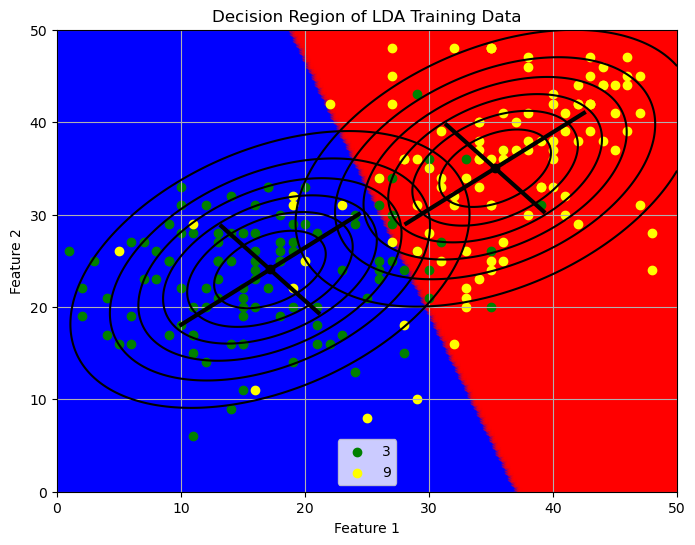

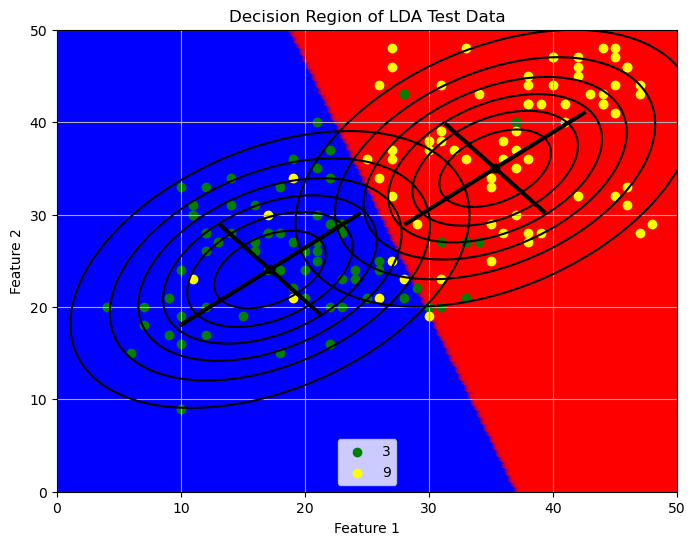

In [36]:
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal

features = [features_train, features_test]
y = [y_train, y_test]
titles = ["Decision Region of LDA Training Data", "Decision Region of LDA Test Data"]
for i in range(len(features)):

    # Create a 200x200 grid
    x_min, x_max = 0, 50
    y_min, y_max = 0, 50
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    grid_values = np.c_[xx.ravel(), yy.ravel()]

    # Classify test points based on the decision boundary
    decision_region = predict_lda(feature_mu, feature_covmat, feature_p, grid_values) 

    # Extract x and y coordinates from grid_values
    x_coords = grid_values[:, 0]
    y_coords = grid_values[:, 1]

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, c=np.where(decision_region == -1, 'blue', 'red'), marker='o', alpha=0.5)

    plt.scatter(features[i][y[i] == 3, 0], features[i][y[i] == 3, 1], c='green', marker='o', label='3')
    plt.scatter(features[i][y[i] == 9, 0], features[i][y[i] == 9, 1], c='yellow', marker='o', label='9')


    eigenvalues, eigenvectors = np.linalg.eig(feature_covmat)

    # Plot each Gaussian distribution
    for j in range(len(feature_mu)):
        # Compute PDF values for the grid points
        pdf_values = multivariate_normal.pdf(grid_values, mean=feature_mu[j], cov=feature_covmat)

        # Reshape PDF values to match grid shape
        pdf_values = pdf_values.reshape(xx.shape)

        # Plot isocontours (ellipses)
        plt.contour(xx, yy, pdf_values, colors='k')

        # Plot mean of the Gaussian distribution
        plt.plot(feature_mu[j][0], feature_mu[j][1], 'ko')

        # Compute standard deviations along each principal component (square roots of eigenvalues)
        std_devs = np.sqrt(eigenvalues)

        # Get principal cluster axes (eigenvectors)
        principal_axes = eigenvectors.T[j] * std_devs[j]  # Scale eigenvectors by standard deviations

        # Plot principal cluster axes
        plt.plot([feature_mu[0][0] - principal_axes[0], feature_mu[0][0] + principal_axes[0]],
                 [feature_mu[0][1] - principal_axes[1], feature_mu[0][1] + principal_axes[1]], 'k', linewidth=3)
        
        plt.plot([feature_mu[1][0] - principal_axes[0], feature_mu[1][0] + principal_axes[0]],
                 [feature_mu[1][1] - principal_axes[1], feature_mu[1][1] + principal_axes[1]], 'k', linewidth=3)
        


    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(titles[i])
    plt.legend()
    plt.grid(True)
    plt.show()

Although the points for the LDA with the Training data look like they are closer to the mean of the gaussian distribution, the actual error rate is higher for the LDA with the Training data which is unusual.

<div style="color: green; font-weight: bold">Comment</div>

Both implementations visualize the decision regions and the mean of each class. But in our implementation we visualize the cluster shape using ellipses. Unfortunately, I made a mistake when drawing radii of the clusters, I only printed one for each mean value.

Instead of the line:

plt.plot([feature_mu[j][0] - principal_axes[0], feature_mu[j][0] + principal_axes[0]],
         [feature_mu[j][1] - principal_axes[1], feature_mu[j][1] + principal_axes[1]], 'k', linewidth=3)

It should have been:

plt.plot([feature_mu[0][0] - principal_axes[0], feature_mu[0][0] + principal_axes[0]],
         [feature_mu[0][1] - principal_axes[1], feature_mu[0][1] + principal_axes[1]], 'k', linewidth=3)
        
plt.plot([feature_mu[1][0] - principal_axes[0], feature_mu[1][0] + principal_axes[0]],
         [feature_mu[1][1] - principal_axes[1], feature_mu[1][1] + principal_axes[1]], 'k', linewidth=3)

Otherwise, due to the iterator j I'm only plotting the first radius for the first mean and only the second one for the second mean.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

estimator = LinearDiscriminantAnalysis()


scores = cross_val_score(estimator, X_all, y_all, cv=10)
print(scores.mean())

0.9779279279279278


The sklearn implementation of the LDA reaches even for all 64 pixels used as feature a pretty high accuracy of 0.978. This, as well as the different Error Rates from our implementation would suggest that our features are not very well selected.

<div style="color: green; font-weight: bold">Comment</div>

Opposed to the given solution we use all available data instead of again filtering for dead pixels. Of course it is better to reduce the dimensions especially when it is free like this but based on the given task we thought we should use all the available data. Futhermore, as the task suggests we used the sklearn implementation of the cross_val_score and the LinearDisciminantAnalysis. At the end we take the average of the accuracies and compare it to our own implementation of the LDA without cross validation.

If we would want to use the sklearn implementation of the cross_va_score() function with our own LDA fit and predict functions we would have needed to adapt our code, wrap it inside a Class classifier and provide the needed APIs like fit(), predict(), score(), and some more, which we didn't do since we weren't sure if it was part of the task.

113
64
33
15
9
5
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

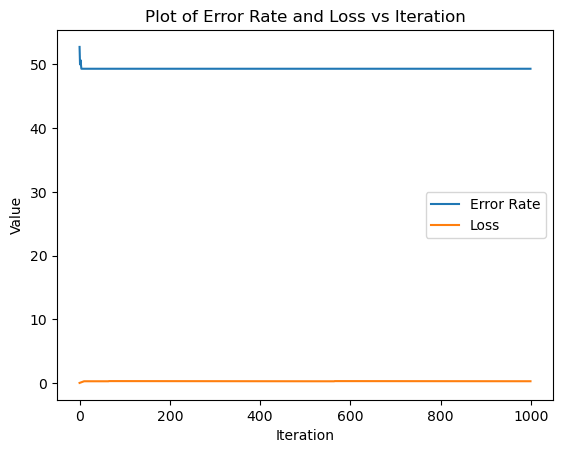

In [45]:
def calculate_delta_loss(X, y, beta, b, _lambda):
    sum_b = 0
    sum_beta = 0
    count = 0
    for i in range(len(y)):
            if y[i] * (np.dot(X[i], beta) + b) < 1:
                sum_beta -= y[i] * np.transpose(X[i])
                sum_b -= y[i]
                count += 1
    delta_b = (_lambda / np.maximum(count, 1)) * sum_b
    delta_beta = beta + (_lambda / np.maximum(count, 1)) * sum_beta
    print(count)

    return delta_beta, delta_b

def fit_svm(training_features, training_labels, _lambda, beta, b, tau):
    _sum = 0
    for i in range(len(training_labels)):
        _sum += np.maximum(1 - training_labels[i] * (np.dot(training_features[i], beta)) + b, 0)

    loss = 0.5 * np.dot(np.transpose(beta), beta) + (_lambda / len(training_labels)) * _sum

    delta_beta, delta_b = calculate_delta_loss(training_features, training_labels, beta, b, _lambda)
    beta -= tau * delta_beta
    b -= tau * delta_b

    return loss, beta, b

def predict_svm(test_features, beta, b):
    return np.sign(np.dot(test_features, beta) + b)


tau = 0.0001
_lambda = 10
#beta = np.random.normal(0, 1, training_features.shape[1])
#b = 0
beta = np.array([0.24034121, 0.08780151])
b = -8.948143239056721

epochs = 1000
error_rate_list = []
loss_list = []

for i in range(epochs):
    if i == 900:
        tau /= 10
    predicted_labels = predict_svm(features_train, beta, b)
    error_rate = calculate_error_rate(predicted_labels, y_test)
    loss, beta, b = fit_svm(features_train, y_train, _lambda, beta, b, tau)
    error_rate_list.append(error_rate*100)
    loss_list.append(loss)

plt.plot(range(epochs), error_rate_list, label='Error Rate')
plt.plot(range(epochs), loss_list, label='Loss')

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Plot of Error Rate and Loss vs Iteration')
plt.legend()
plt.show()



<div style="color: green; font-weight: bold">Comment</div>

The implementation for predict_svm() is essentially the same as well as the initial values for beta and b (at least at the beginning, later we tried with already good initial values). In the beginning we also had 0.01 for tau but our fit_svm() function immediately butchered the prediction after the first iteration, hence we set the value to 0.0001 to try to inspect why this is. Unfortuately we couldn't pinpoint our mistake. Now with the given solution we can inspect this in more detail and there are a few difference I can spot.

1. In the given solution, in the computation of the loss the dot product of beta and beta is calculated whereas we calculate the dot product of beta and beta transposed like we understood it from the given formula.
2. We pass the test data to the predict_svm() function instead of the training data which we probably did out of habit but since it is part of the training we should pass the training data.
3. In our implementation of the gradient descent algorithm, we divide by len(y) which isn't correct since we should only divde by the amount of samples that actually fulfill the margin requirement.



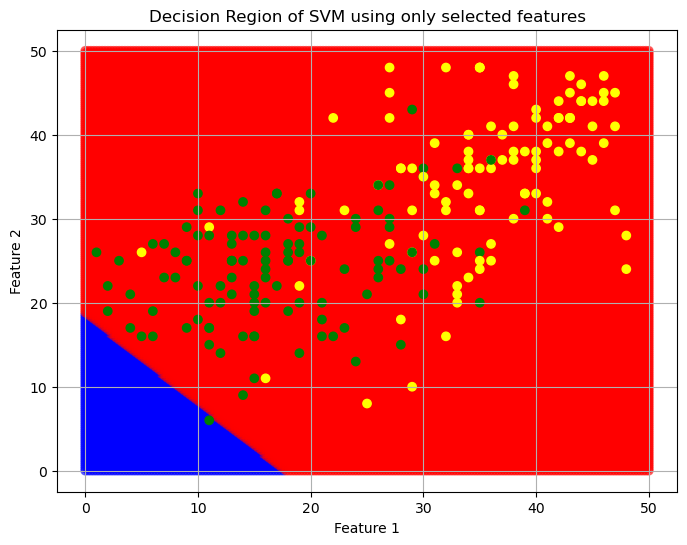

In [ ]:
# Create a 200x200 grid
x_min, x_max = 0, 50
y_min, y_max = 0, 50
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

grid_values = np.c_[xx.ravel(), yy.ravel()]

# Classify test points based on the decision boundary
decision_region = predict_svm(grid_values, beta, b)

# Extract x and y coordinates from grid_values
x_coords = grid_values[:, 0]
y_coords = grid_values[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, c=np.where(decision_region == -1, 'blue', 'red'), marker='o', alpha=0.5)
plt.scatter(features_train[:, 0], features_train[:, 1], c=np.where(y_train == 3, 'green', 'yellow'), marker='o', label='Training Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region of SVM using only selected features')
plt.grid(True)
plt.show()

Somehow, even if we choose good initial values  for beta and b that we have from the LDA, the SVM doesn't perform as expected. No matter how the hyperparameters are changed, the error rate always seems to converge to about 50%. In the Decision Region it is good visible that the reason for the ca. 50% error rate is that the decision boundary got moved so far to one side that almost every data point is on the same side. In comparison the sklearn implementation of the SVM works very well with an average accuracy of 0.986. This would suggest that either we did something wrong with the hyperparameters or our implementation is incorrect.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

estimator = SVC(kernel='linear', C=1.0, gamma='auto')
scores = cross_val_score(estimator, X_all, y_all, cv=10) 

print(scores.mean())

0.9862612612612611
